In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-places-to-visit-reviews-data/Review_db.csv


In [2]:
import pandas as pd
datafile=os.path.join(dirname, filename)
df = pd.read_csv(datafile)

In [3]:
df.sample(10)

,City,Place,Review,Rating,Name,Date,Raw_Review
940989,Mumbai,Sri Sri Radha Gopinath Temple,hare krsna captured essence rgm quite literall...,5,Anonymous,NaN,"Hare Krsna,\n\nYou have indeed captured the es..."
1224965,Pune,Vetal Hill,perfect place joggers fitness enthusiasts envi...,5,Anonymous,NaN,"A perfect place for joggers, fitness enthusias..."
1298684,Shimla,The Mall,simple road like hill station special road enj...,5,Anonymous,NaN,"A simple road just like on every hill station,..."
188424,Bengaluru,Wonderla Amusement Park,hello thank sharing valuable feedback delighte...,5,Anonymous,NaN,"Hello,\n\nThank you for sharing your valuable ..."
212469,Bhubaneswar,Satkosia Tiger Reserve,allowed core area unlikely come tigers time sp...,4,Anonymous,NaN,You are not allowed into the core area. You ar...
394130,Gurugram (Gurgaon),Ambience Mall,malls food court looking place eat local food ...,4,Anonymous,NaN,Some of the malls don’t have any food court. I...
1154682,Panchgani,Parsi Point,visit place time vistors especially children l...,5,Anonymous,NaN,"must visit place for first time vistors, espec..."
184185,Bengaluru,UB City,ub city exquisite mall lots high end brands sh...,5,Anonymous,NaN,"The UB City is an exquisite mall, with lots of..."
228268,Calangute,Calangute Beach,awesome beach brilliant sunset kids fun playin...,5,Anonymous,NaN,Awesome beach with a brilliant sunset. Kids ha...
92010,Amritsar,Golden Temple,place spiritual pure holy clean inside premise...,3,Anonymous,NaN,"The place is so spiritual....!! So pure, so ho..."


In [4]:
city_counts = df['City'].value_counts()
print(city_counts)

City
New Delhi      96937
Mumbai         81483
Bengaluru      54733
Hyderabad      39622
Agra           39271
               ...  
Chettikulam        1
Turuvekere         1
Banni              1
Samaguri           1
Dhali              1
Name: count, Length: 1794, dtype: int64


In [5]:
!pip install -q mpldatacursor

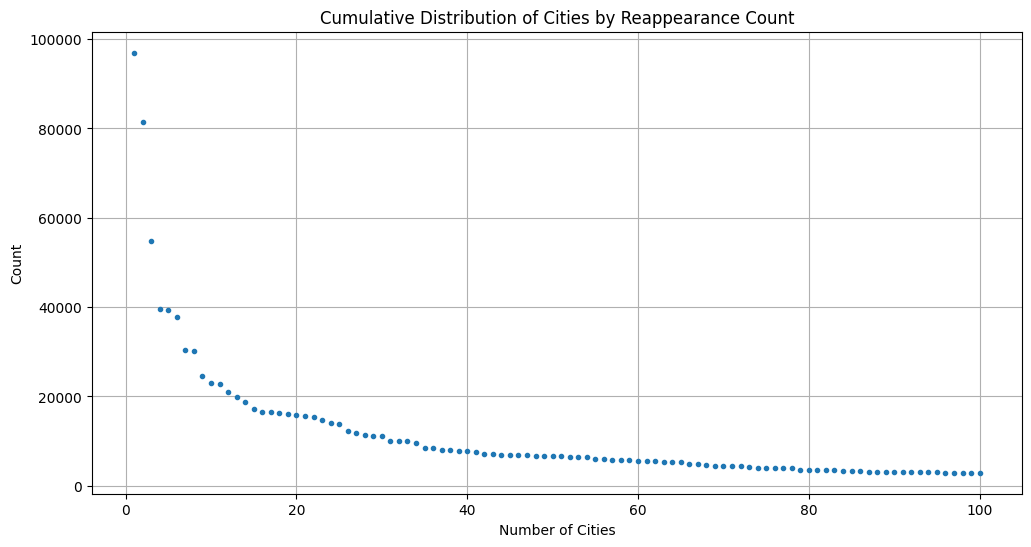

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import mpldatacursor  # Import the mpldatacursor library


# Use value_counts to count unique cities and their occurrences
city_counts = df['City'].value_counts()

# Sort the city counts in descending order
city_counts = city_counts.sort_values(ascending=False)

# Create the cumulative distribution plot with the number of cities on the x-axis
plt.figure(figsize=(12, 6))  # Set the figure size
x_values = list(range(1, len(city_counts) + 1))
y_values = city_counts.values

# Limit the range of x-axis to be between 0 and 100
x_values = [x for x in x_values if 0 <= x <= 100]
y_values = y_values[:len(x_values)]

plt.plot(x_values, y_values, marker='.', linestyle='none')
plt.title('Cumulative Distribution of Cities by Reappearance Count')
plt.xlabel('Number of Cities')
plt.ylabel('Count')
plt.grid(True)

plt.show()


In [7]:

# Use value_counts to count unique cities and their occurrences
city_counts = df['City'].value_counts()

# Sort the city counts in descending order and select the top 100 cities
top_cities = city_counts.head(100)

# Create a list to store dictionaries
result_data = []

for city in top_cities.index:
    city_count = top_cities[city]
    city_places = df[df['City'] == city]['Place'].value_counts()
    
    for place, place_count in city_places.items():
        result_data.append({'City': city, 'City_Count': city_count, 'Place': place, 'Place_Count': place_count})

# Create a DataFrame from the list of dictionaries
result_df = pd.DataFrame(result_data)

# Save the new dataset to a CSV file
result_df.to_csv('top_100_cities_and_places.csv', index=False)

In [8]:
result_df = result_df.sort_values(by=['City_Count', 'Place_Count'], ascending=[False, False])
result_df.to_csv('top_100_cities_and_places.csv', index=False)

In [9]:
result_df.head(10)

,City,City_Count,Place,Place_Count
0,New Delhi,96937,Qutub Minar,10358
1,New Delhi,96937,Swaminarayan Akshardham,9770
2,New Delhi,96937,India Gate,8330
3,New Delhi,96937,Humayun's Tomb,7970
4,New Delhi,96937,Gurudwara Bangla Sahib,5584
5,New Delhi,96937,Lotus Temple,5387
6,New Delhi,96937,Red Fort (Lal Quila),4260
7,New Delhi,96937,Chandni Chowk,3646
8,New Delhi,96937,Lodhi Garden,3457
9,New Delhi,96937,Connaught Place,2988


In [10]:
qutub_df = df[df['Place'] == "Qutub Minar"]

if not qutub_df.empty:
    # Get the count of "Qutub Minar" (assuming there's only one match)
    count = qutub_df.shape[0]  # Number of rows matching the place

    print(f"Place 'Qutub Minar' is found in {count} reviews.")
else:
    print("Place 'Qutub Minar' not found in the dataset.")

Place 'Qutub Minar' is found in 10358 reviews.
